<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris (2).csv
✅ Dataset loaded successfully!
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K=1: Accuracy = 1.000
K=3: Accuracy = 1.000
K=5: Accuracy = 1.000
K=7: Accuracy = 1.000
K=9: Accuracy = 1.000


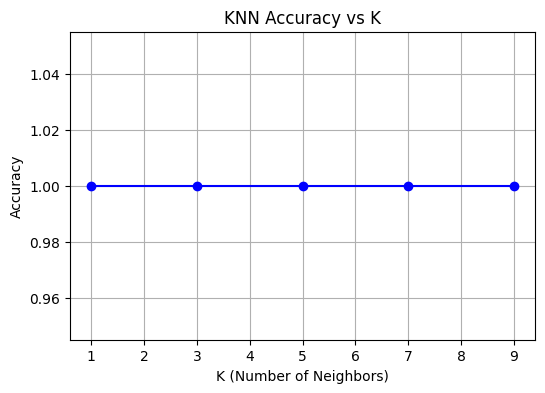


🏆 Best K value = 1

Confusion Matrix:


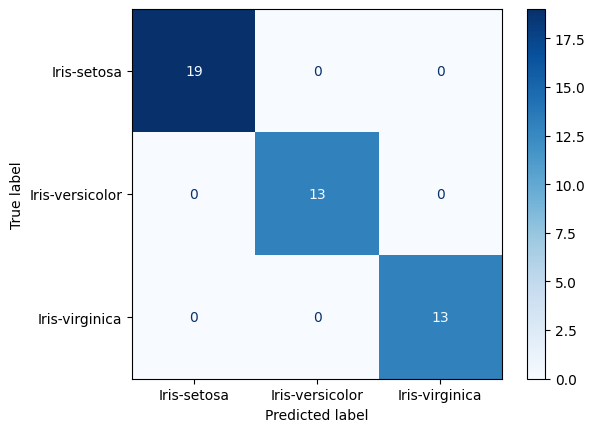

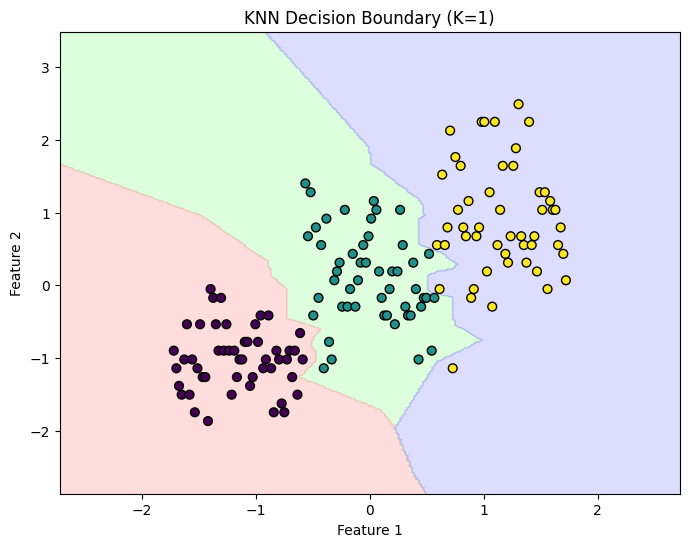

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print("✅ Dataset loaded successfully!")
print(df.head())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}: Accuracy = {acc:.3f}")

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', color='b')
plt.title("KNN Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
best_k = k_values[np.argmax(accuracies)]
print(f"\n🏆 Best K value = {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.show()

X_plot = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_plot, y_encoded, test_size=0.3, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train2, y_train2)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded, edgecolor='k', s=40)
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
